In [31]:

!pip install qutip
from qutip import *
import numpy as np
from numpy import sqrt, pi, array, sin, cos, arange
import matplotlib.pyplot as plt


In [32]:

omega = 2.0             
t_larmor = np.linspace(0, 4*pi/omega, 100) 

rabi_freq = 0.5 * 2 * pi  
t_rabi = np.linspace(0, 2*pi/rabi_freq, 100)  

psi0_larmor = (basis(2,0) + basis(2,1)).unit() 
psi0_rabi = basis(2,0)                      

H_larmor = -omega * sigmaz() / 2.0  
H_rabi = rabi_freq * sigmax() / 2.0 


expect_ops = [sigmax()/2.0, sigmay()/2.0, sigmaz()/2.0] 
labels = ['Sx', 'Sy', 'Sz']

gamma = 0.5  
c_ops = [np.sqrt(gamma) * sigmaz()]

Running Larmor Precession (sesolve)


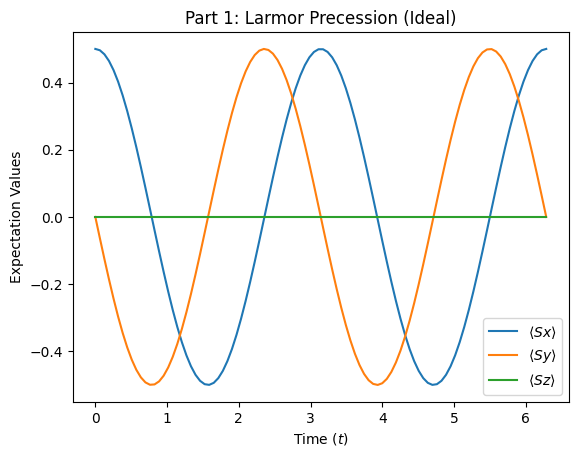

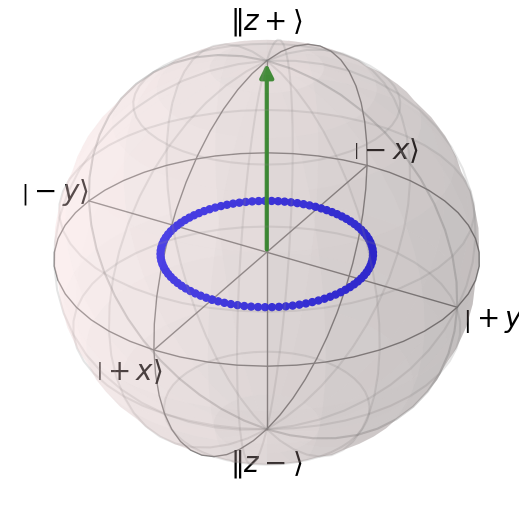

In [33]:

print("Running Larmor Precession (sesolve)")
result_larmor = sesolve(H_larmor, psi0_larmor, t_larmor, expect_ops)

plt.figure()
for i, l in enumerate(labels):
    plt.plot(t_larmor, result_larmor.expect[i], label=f"$\\langle {l} \\rangle$")
plt.xlabel("Time ($t$)")
plt.ylabel("Expectation Values")
plt.legend()
plt.title("Part 1: Larmor Precession (Ideal)")
plt.show()

b = Bloch()
b.add_points([result_larmor.expect[0], result_larmor.expect[1], result_larmor.expect[2]])
b.add_vectors([0,0,1])
b.zlabel = ['$\|z+\\rangle$','$\|z-\\rangle$']
b.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']
b.show()

Running Rabi Oscillations (sesolve)...


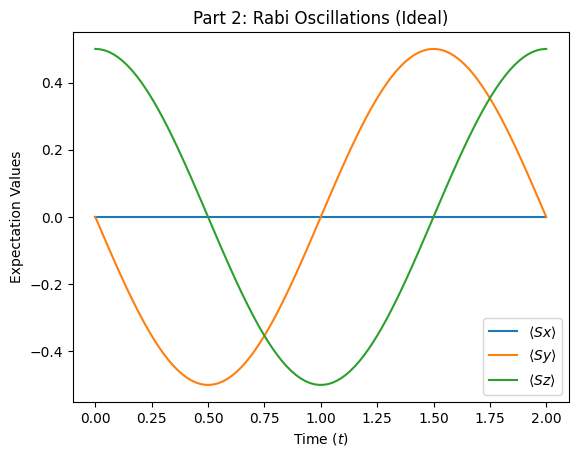

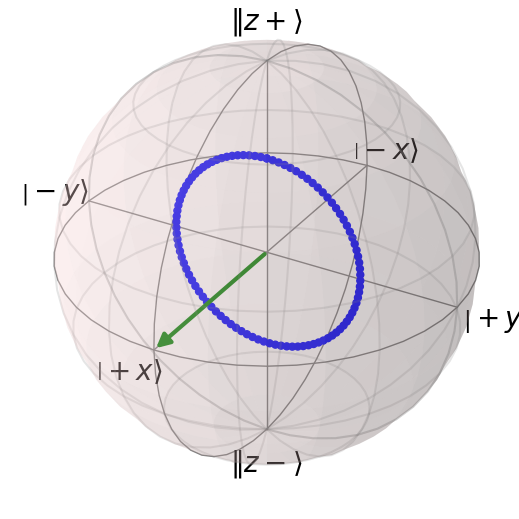

In [ ]:

print("Running Rabi Oscillations (sesolve)...")
result_rabi = sesolve(H_rabi, psi0_rabi, t_rabi, expect_ops)

plt.figure()
for i, l in enumerate(labels):
    plt.plot(t_rabi, result_rabi.expect[i], label=f"$\\langle {l} \\rangle$")
plt.xlabel("Time ($t$)")
plt.ylabel("Expectation Values")
plt.legend()
plt.title("Part 2: Rabi Oscillations (Ideal)")
plt.show()

b = Bloch()
b.add_points([result_rabi.expect[0], result_rabi.expect[1], result_rabi.expect[2]])
b.add_vectors([1,0,0]) 
b.zlabel = ['$\|z+\\rangle$','$\|z-\\rangle$']
b.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']
b.show()

Running Larmor Precession with Decoherence (mesolve)...


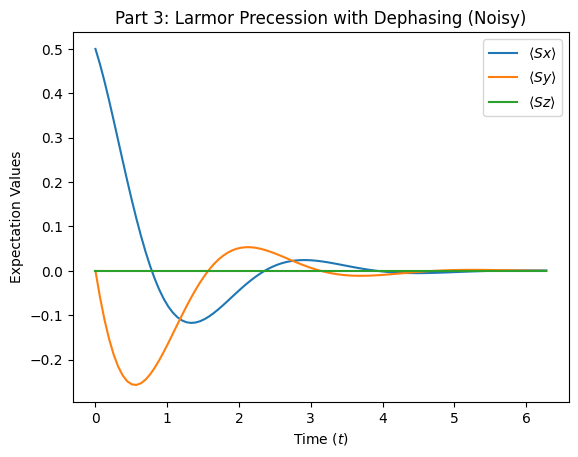

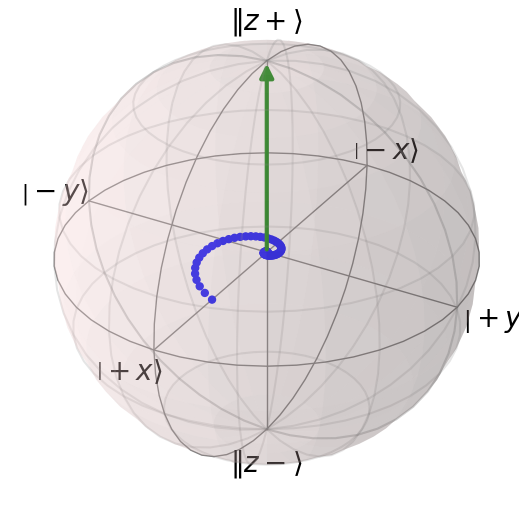

In [ ]:

print("Running Larmor Precession with Decoherence (mesolve)...")
result_deco = mesolve(H_larmor, psi0_larmor, t_larmor, c_ops, expect_ops)

plt.figure()
for i, l in enumerate(labels):
    plt.plot(t_larmor, result_deco.expect[i], label=f"$\\langle {l} \\rangle$")
plt.xlabel("Time ($t$)")
plt.ylabel("Expectation Values")
plt.legend()
plt.title("Part 3: Larmor Precession with Dephasing (Noisy)")
plt.show()

b = Bloch()
b.add_points([result_deco.expect[0], result_deco.expect[1], result_deco.expect[2]])
b.add_vectors([0,0,1])
b.zlabel = ['$\|z+\\rangle$','$\|z-\\rangle$']
b.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']
b.show()